In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Plots with IO time

## 1 MB file

### Sequential time computation

In [2]:
sequential_time = pd.read_csv('../results/seq_results_1MB.csv', index_col=None)

In [3]:
# Compute the mean of the last column based on the penultimate column
sequential_time = sequential_time.groupby(sequential_time.columns[-2])[sequential_time.columns[-1]].mean()

In [4]:
seq_time = sequential_time[0]
ideal_time = [[1, 3200 + 61000 + 210]]

for i in range (2, 65, 2):
    ideal_time.append([i, 3200 + 61000/i + 210*i])

ideal_time = pd.DataFrame(ideal_time, columns=['Number of threads', 'Completion time'])

In [5]:
ideal_speedup = [[1, seq_time/ideal_time['Completion time'][0]]]

for i in range (2, 65, 2):
    ideal_speedup.append([i, seq_time/ideal_time['Completion time'][i/2]])

ideal_speedup = pd.DataFrame(ideal_speedup, columns=['Number of threads', 'Speedup'])

### Native threads time computation

In [6]:
thread_time = pd.read_csv('../results/thread_results_1MB.csv', index_col=None)

In [7]:
# Split the dataframe in two, based on the Completion time (if with or without IO)
thread_time_completion = thread_time[thread_time['Completion time'] == 'Completion time']
thread_time_no_io = thread_time[thread_time['Completion time'] == 'Completion time (no IO)']

thread_time = thread_time_completion

In [8]:
# Compute the mean of the last column based on the penultimate column
thread_time = thread_time.groupby(thread_time.columns[-2])[thread_time.columns[-1]].mean()
thread_time_no_io = thread_time_no_io.groupby(thread_time_no_io.columns[-2])[thread_time_no_io.columns[-1]].mean()

### Fastflow time computation

In [9]:
ff_time = pd.read_csv('../results/ff_results_1MB.csv', index_col=None)

In [10]:
# Split the dataframe in two, based on the Completion time (if with or without IO)
ff_time_completion = ff_time[ff_time['Completion time'] == 'Completion time']
ff_time_no_io = ff_time[ff_time['Completion time'] == 'Completion time (no IO)']

ff_time = ff_time_completion

In [11]:
# Compute the mean of the last column based on the penultimate column
ff_time = ff_time.groupby(ff_time.columns[-2])[ff_time.columns[-1]].mean()
ff_time_no_io = ff_time_no_io.groupby(ff_time_no_io.columns[-2])[ff_time_no_io.columns[-1]].mean()

## Plots

### Completion time

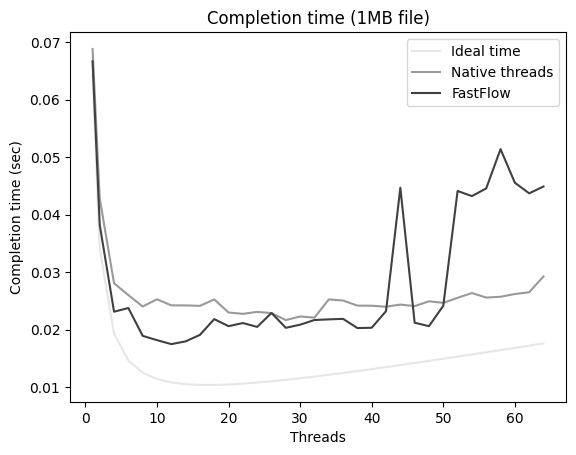

In [12]:
plt.plot(ideal_time['Number of threads'], ideal_time['Completion time']/1e6, c='0.90')

plt.plot(thread_time.index, thread_time.values/1e6, c='0.60')
plt.plot(ff_time.index, ff_time.values/1e6, c='0.25')
plt.xlabel('Threads')
plt.ylabel('Completion time (sec)')
plt.legend(["Ideal time", "Native threads", "FastFlow"], loc=0, frameon=True)
plt.title("Completion time (1MB file)")
plt.savefig('Completion_1MB.png', bbox_inches='tight')
plt.show()

### Speedup

In [13]:
speedup_thread = []
speedup_ff = []

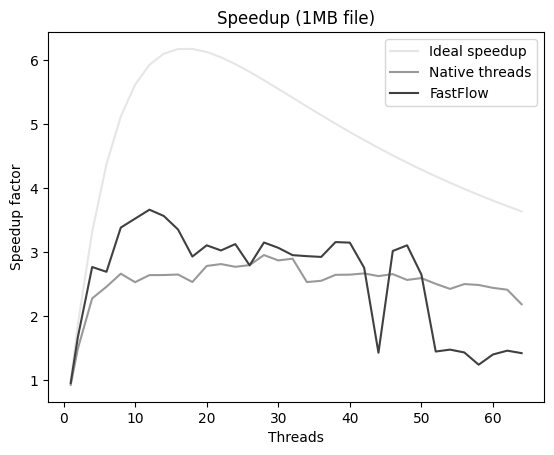

In [14]:
for i in range (0, len(thread_time)):
    speedup_thread.append([thread_time.index[i], seq_time/thread_time.iat[i]])
    
for i in range (0, len(ff_time)):
    speedup_ff.append([ff_time.index[i], seq_time/ff_time.iat[i]])
    
speedup_thread = pd.DataFrame(speedup_thread, columns=['Number of threads', 'Speedup'])
speedup_ff = pd.DataFrame(speedup_ff, columns=['Number of threads', 'Speedup'])

plt.plot(ideal_speedup['Number of threads'], ideal_speedup['Speedup'], c='0.9')
plt.plot(speedup_thread['Number of threads'], speedup_thread['Speedup'], c='0.6')
plt.plot(speedup_ff['Number of threads'], speedup_ff['Speedup'], c='0.25')

plt.ylabel('Speedup factor')
plt.xlabel("Threads")
plt.legend(["Ideal speedup", "Native threads", "FastFlow"], loc=0, frameon=True)
plt.title("Speedup (1MB file)")
plt.savefig('Speedup_1MB.png', bbox_inches='tight')
plt.show()

### Scalability

In [15]:
parallel_time_thread_1 = thread_time.iat[0]
parallel_time_ff_1 = ff_time.iat[0]

scalability_thread = []
scalability_ff = []

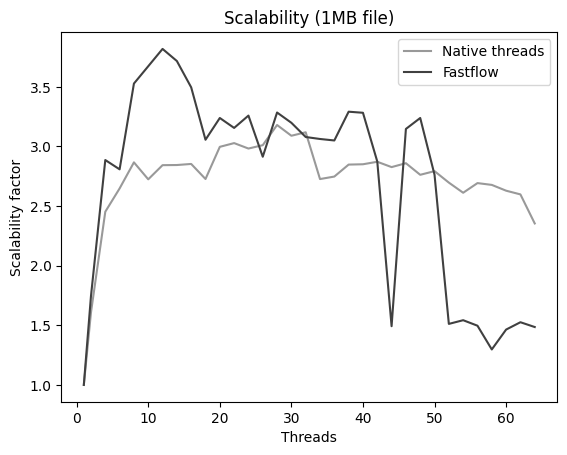

In [16]:
for i in range (0, len(thread_time)):
    scalability_thread.append([thread_time.index[i], parallel_time_thread_1/thread_time.iat[i]])

for i in range (0, len(ff_time)):
    scalability_ff.append([ff_time.index[i], parallel_time_ff_1/ff_time.iat[i]])

scalability_thread = pd.DataFrame(scalability_thread, columns=['Number of threads', 'Scalability'])
scalability_ff = pd.DataFrame(scalability_ff, columns=['Number of threads', 'Scalability'])

plt.plot(scalability_thread['Number of threads'], scalability_thread['Scalability'], c='0.6')
plt.plot(scalability_ff['Number of threads'], scalability_ff['Scalability'], c='0.25')

plt.ylabel("Scalability factor")
plt.xlabel("Threads")
plt.legend(["Native threads", "Fastflow"], loc=0, frameon=True)
plt.title("Scalability (1MB file)")
plt.savefig('Scalability_1MB.png', bbox_inches='tight')
plt.show()

# 10 MB file

### Sequential time computation

In [17]:
sequential_time = pd.read_csv('../results/seq_results_10MB.csv', index_col=None)

In [18]:
# Compute the mean of the last column based on the penultimate column
sequential_time = sequential_time.groupby(sequential_time.columns[-2])[sequential_time.columns[-1]].mean()

In [19]:
seq_time = sequential_time[0]
ideal_time = [[1, 22000 + 626000 + 210]]

for i in range (2, 65, 2):
    ideal_time.append([i, 22000 + 626000/i + 210*i])

ideal_time = pd.DataFrame(ideal_time, columns=['Number of threads', 'Completion time'])

In [20]:
ideal_speedup = [[1, seq_time/ideal_time['Completion time'][0]]]

for i in range (2, 65, 2):
    ideal_speedup.append([i, seq_time/ideal_time['Completion time'][i/2]])

ideal_speedup = pd.DataFrame(ideal_speedup, columns=['Number of threads', 'Speedup'])

### Native threads time computation

In [21]:
thread_time = pd.read_csv('../results/thread_results_10MB.csv', index_col=None)

In [22]:
# Split the dataframe in two, based on the Completion time (if with or without IO)
thread_time_completion = thread_time[thread_time['Completion time'] == 'Completion time']
thread_time_no_io = thread_time[thread_time['Completion time'] == 'Completion time (no IO)']

thread_time = thread_time_completion

In [23]:
# Compute the mean of the last column based on the penultimate column
thread_time = thread_time.groupby(thread_time.columns[-2])[thread_time.columns[-1]].mean()
thread_time_no_io = thread_time_no_io.groupby(thread_time_no_io.columns[-2])[thread_time_no_io.columns[-1]].mean()

### Fastflow time computation

In [24]:
ff_time = pd.read_csv('../results/ff_results_10MB.csv', index_col=None)

In [25]:
# Split the dataframe in two, based on the Completion time (if with or without IO)
ff_time_completion = ff_time[ff_time['Completion time'] == 'Completion time']
ff_time_no_io = ff_time[ff_time['Completion time'] == 'Completion time (no IO)']

ff_time = ff_time_completion

In [26]:
# Compute the mean of the last column based on the penultimate column
ff_time = ff_time.groupby(ff_time.columns[-2])[ff_time.columns[-1]].mean()
ff_time_no_io = ff_time_no_io.groupby(ff_time_no_io.columns[-2])[ff_time_no_io.columns[-1]].mean()

## Plots

### Completion time

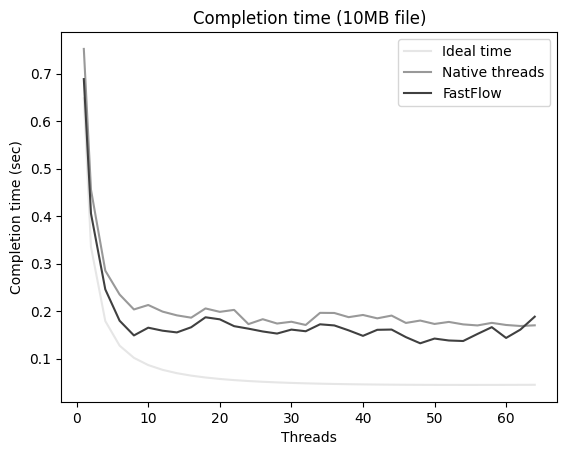

In [27]:
plt.plot(ideal_time['Number of threads'], ideal_time['Completion time']/1e6, c='0.90')

plt.plot(thread_time.index, thread_time.values/1e6, c='0.60')
plt.plot(ff_time.index, ff_time.values/1e6, c='0.25')
plt.xlabel('Threads')
plt.ylabel('Completion time (sec)')
plt.legend(["Ideal time", "Native threads", "FastFlow"], loc=0, frameon=True)
plt.title("Completion time (10MB file)")
plt.savefig('Completion_10MB.png', bbox_inches='tight')
plt.show()

### Speedup

In [28]:
speedup_thread = []
speedup_ff = []

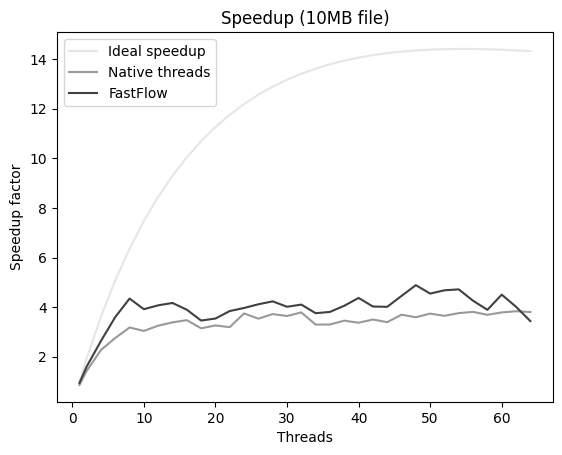

In [29]:
for i in range (0, len(thread_time)):
    speedup_thread.append([thread_time.index[i], seq_time/thread_time.iat[i]])
    
for i in range (0, len(ff_time)):
    speedup_ff.append([ff_time.index[i], seq_time/ff_time.iat[i]])
    
plt.plot(ideal_speedup['Number of threads'], ideal_speedup['Speedup'], c='0.9')
speedup_thread = pd.DataFrame(speedup_thread, columns=['Number of threads', 'Speedup'])
speedup_ff = pd.DataFrame(speedup_ff, columns=['Number of threads', 'Speedup'])

plt.plot(speedup_thread['Number of threads'], speedup_thread['Speedup'], c='0.6')
plt.plot(speedup_ff['Number of threads'], speedup_ff['Speedup'], c='0.25')

plt.ylabel('Speedup factor')
plt.xlabel("Threads")
plt.legend(["Ideal speedup", "Native threads", "FastFlow"], loc=0, frameon=True)
plt.title("Speedup (10MB file)")
plt.savefig('Speedup_10MB.png', bbox_inches='tight')
plt.show()

### Scalability

In [30]:
parallel_time_thread_1 = thread_time.iat[0]
parallel_time_ff_1 = ff_time.iat[0]

scalability_thread = []
scalability_ff = []

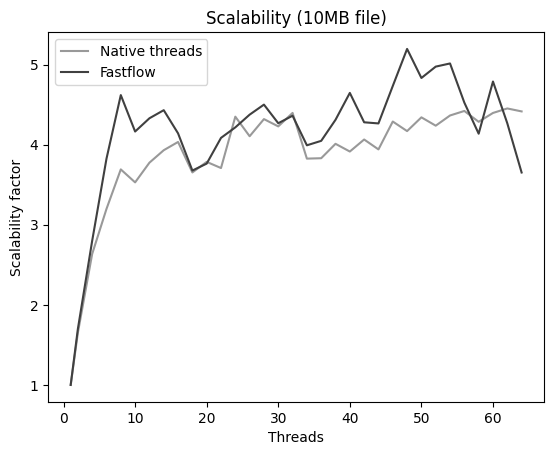

In [31]:
for i in range (0, len(thread_time)):
    scalability_thread.append([thread_time.index[i], parallel_time_thread_1/thread_time.iat[i]])

for i in range (0, len(ff_time)):
    scalability_ff.append([ff_time.index[i], parallel_time_ff_1/ff_time.iat[i]])

scalability_thread = pd.DataFrame(scalability_thread, columns=['Number of threads', 'Scalability'])
scalability_ff = pd.DataFrame(scalability_ff, columns=['Number of threads', 'Scalability'])

plt.plot(scalability_thread['Number of threads'], scalability_thread['Scalability'], c='0.6')
plt.plot(scalability_ff['Number of threads'], scalability_ff['Scalability'], c='0.25')

plt.ylabel("Scalability factor")
plt.xlabel("Threads")
plt.legend(["Native threads", "Fastflow"], loc=0, frameon=True)
plt.title("Scalability (10MB file)")
plt.savefig('Scalability_10MB.png', bbox_inches='tight')
plt.show()

# 100 MB file

### Sequential time computation

In [32]:
sequential_time = pd.read_csv('../results/seq_results_100MB.csv', index_col=None)

In [33]:
# Compute the mean of the last column based on the penultimate column
sequential_time = sequential_time.groupby(sequential_time.columns[-2])[sequential_time.columns[-1]].mean()

In [34]:
seq_time = sequential_time[0]
ideal_time = [[1, 268000 + 6600000 + 210]]

for i in range (2, 65, 2):
    ideal_time.append([i, 268000 + 6600000/i + 210*i])

ideal_time = pd.DataFrame(ideal_time, columns=['Number of threads', 'Completion time'])

In [35]:
ideal_speedup = [[1, seq_time/ideal_time['Completion time'][0]]]

for i in range (2, 65, 2):
    ideal_speedup.append([i, seq_time/ideal_time['Completion time'][i/2]])

ideal_speedup = pd.DataFrame(ideal_speedup, columns=['Number of threads', 'Speedup'])

### Native threads time computation

In [36]:
thread_time = pd.read_csv('../results/thread_results_100MB.csv', index_col=None)

In [37]:
# Split the dataframe in two, based on the Completion time (if with or without IO)
thread_time_completion = thread_time[thread_time['Completion time'] == 'Completion time']
thread_time_no_io = thread_time[thread_time['Completion time'] == 'Completion time (no IO)']

thread_time = thread_time_completion

In [38]:
# Compute the mean of the last column based on the penultimate column
thread_time = thread_time.groupby(thread_time.columns[-2])[thread_time.columns[-1]].mean()
thread_time_no_io = thread_time_no_io.groupby(thread_time_no_io.columns[-2])[thread_time_no_io.columns[-1]].mean()

### Fastflow time computation

In [39]:
ff_time = pd.read_csv('../results/ff_results_100MB.csv', index_col=None)

In [40]:
# Split the dataframe in two, based on the Completion time (if with or without IO)
ff_time_completion = ff_time[ff_time['Completion time'] == 'Completion time']
ff_time_no_io = ff_time[ff_time['Completion time'] == 'Completion time (no IO)']

ff_time = ff_time_completion

In [41]:
# Compute the mean of the last column based on the penultimate column
ff_time = ff_time.groupby(ff_time.columns[-2])[ff_time.columns[-1]].mean()
ff_time_no_io = ff_time_no_io.groupby(ff_time_no_io.columns[-2])[ff_time_no_io.columns[-1]].mean()

## Plots

### Completion time

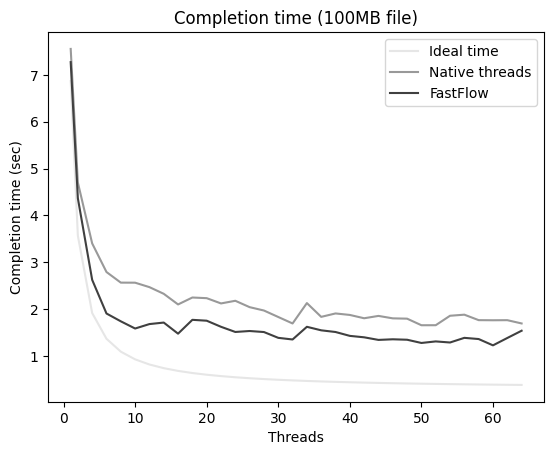

In [42]:
plt.plot(ideal_time['Number of threads'], ideal_time['Completion time']/1e6, c='0.90')

plt.plot(thread_time.index, thread_time.values/1e6, c='0.60')
plt.plot(ff_time.index, ff_time.values/1e6, c='0.25')
plt.xlabel('Threads')
plt.ylabel('Completion time (sec)')
plt.legend(["Ideal time", "Native threads", "FastFlow"], loc=0, frameon=True)
plt.title("Completion time (100MB file)")
plt.savefig('Completion_100MB.png', bbox_inches='tight')
plt.show()

### Speedup

In [43]:
speedup_thread = []
speedup_ff = []

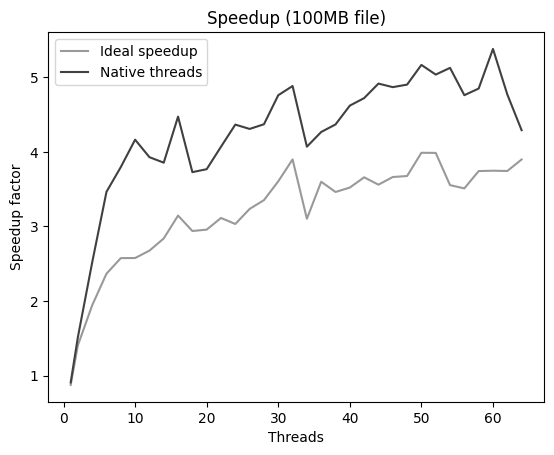

In [44]:
for i in range (0, len(thread_time)):
    speedup_thread.append([thread_time.index[i], seq_time/thread_time.iat[i]])
    
for i in range (0, len(ff_time)):
    speedup_ff.append([ff_time.index[i], seq_time/ff_time.iat[i]])
    
speedup_thread = pd.DataFrame(speedup_thread, columns=['Number of threads', 'Speedup'])
speedup_ff = pd.DataFrame(speedup_ff, columns=['Number of threads', 'Speedup'])

#plt.plot(ideal_speedup['Number of threads'], ideal_speedup['Speedup'], c='0.9')
plt.plot(speedup_thread['Number of threads'], speedup_thread['Speedup'], c='0.6')
plt.plot(speedup_ff['Number of threads'], speedup_ff['Speedup'], c='0.25')

plt.ylabel('Speedup factor')
plt.xlabel("Threads")
plt.legend(["Ideal speedup", "Native threads", "FastFlow"], loc=0, frameon=True)
plt.title("Speedup (100MB file)")
plt.savefig('Speedup_100MB.png', bbox_inches='tight')
plt.show()

### Scalability

In [45]:
parallel_time_thread_1 = thread_time.iat[0]
parallel_time_ff_1 = ff_time.iat[0]

scalability_thread = []
scalability_ff = []

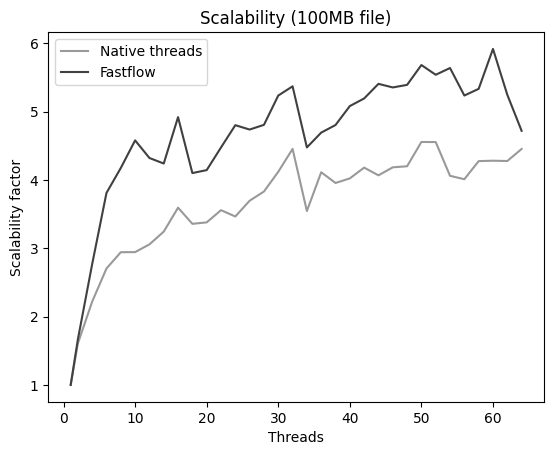

In [46]:
for i in range (0, len(thread_time)):
    scalability_thread.append([thread_time.index[i], parallel_time_thread_1/thread_time.iat[i]])

for i in range (0, len(ff_time)):
    scalability_ff.append([ff_time.index[i], parallel_time_ff_1/ff_time.iat[i]])

scalability_thread = pd.DataFrame(scalability_thread, columns=['Number of threads', 'Scalability'])
scalability_ff = pd.DataFrame(scalability_ff, columns=['Number of threads', 'Scalability'])

plt.plot(scalability_thread['Number of threads'], scalability_thread['Scalability'], c='0.6')
plt.plot(scalability_ff['Number of threads'], scalability_ff['Scalability'], c='0.25')

plt.ylabel("Scalability factor")
plt.xlabel("Threads")
plt.legend(["Native threads", "Fastflow"], loc=0, frameon=True)
plt.title("Scalability (100MB file)")
plt.savefig('Scalability_100MB.png', bbox_inches='tight')
plt.show()

# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# Plots with no IO time

## 1 MB file

### Sequential time computation

In [47]:
sequential_time = pd.read_csv('../results/seq_results_1MB.csv', index_col=None)

In [48]:
# Compute the mean of the last column based on the penultimate column
sequential_time = sequential_time.groupby(sequential_time.columns[-2])[sequential_time.columns[-1]].mean()

In [49]:
seq_time = sequential_time[1]
ideal_time = [[1, 61000 + 210]]

for i in range (2, 65, 2):
    ideal_time.append([i, 61000/i + 210*i])

ideal_time = pd.DataFrame(ideal_time, columns=['Number of threads', 'Completion time (no IO)'])

In [50]:
ideal_speedup = [[1, seq_time/ideal_time['Completion time (no IO)'][0]]]

for i in range (2, 65, 2):
    ideal_speedup.append([i, seq_time/ideal_time['Completion time (no IO)'][i/2]])

ideal_speedup = pd.DataFrame(ideal_speedup, columns=['Number of threads', 'Speedup'])

### Native threads time computation

In [51]:
thread_time = pd.read_csv('../results/thread_results_1MB.csv', index_col=None)

In [52]:
# Split the dataframe in two, based on the Completion time (if with or without IO)
thread_time_completion = thread_time[thread_time['Completion time'] == 'Completion time']
thread_time_no_io = thread_time[thread_time['Completion time'] == 'Completion time (no IO)']

thread_time = thread_time_no_io

In [53]:
# Compute the mean of the last column based on the penultimate column
thread_time = thread_time.groupby(thread_time.columns[-2])[thread_time.columns[-1]].mean()

### Fastflow time computation

In [54]:
ff_time = pd.read_csv('../results/ff_results_1MB.csv', index_col=None)

In [55]:
# Split the dataframe in two, based on the Completion time (if with or without IO)
ff_time_completion = ff_time[ff_time['Completion time'] == 'Completion time']
ff_time_no_io = ff_time[ff_time['Completion time'] == 'Completion time (no IO)']

ff_time = ff_time_completion

In [56]:
# Compute the mean of the last column based on the penultimate column
ff_time = ff_time.groupby(ff_time.columns[-2])[ff_time.columns[-1]].mean()

## Plots

### Completion time

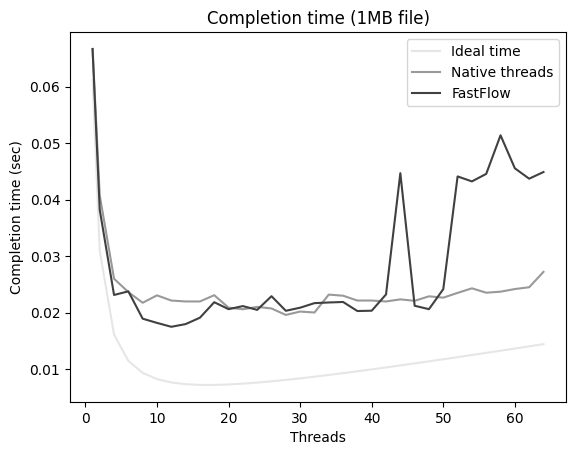

In [57]:
plt.plot(ideal_time['Number of threads'], ideal_time['Completion time (no IO)']/1e6, c='0.90')

plt.plot(thread_time.index, thread_time.values/1e6, c='0.60')
plt.plot(ff_time.index, ff_time.values/1e6, c='0.25')
plt.xlabel('Threads')
plt.ylabel('Completion time (sec)')
plt.legend(["Ideal time", "Native threads", "FastFlow"], loc=0, frameon=True)
plt.title("Completion time (1MB file)")
plt.savefig('Completion_1MB_no_IO.png', bbox_inches='tight')
plt.show()

### Speedup

In [58]:
speedup_thread = []
speedup_ff = []

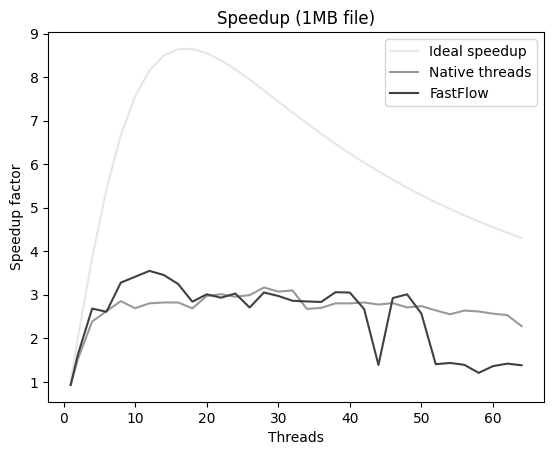

In [59]:
for i in range (0, len(thread_time)):
    speedup_thread.append([thread_time.index[i], seq_time/thread_time.iat[i]])
    
for i in range (0, len(ff_time)):
    speedup_ff.append([ff_time.index[i], seq_time/ff_time.iat[i]])
    
speedup_thread = pd.DataFrame(speedup_thread, columns=['Number of threads', 'Speedup'])
speedup_ff = pd.DataFrame(speedup_ff, columns=['Number of threads', 'Speedup'])

plt.plot(ideal_speedup['Number of threads'], ideal_speedup['Speedup'], c='0.9')
plt.plot(speedup_thread['Number of threads'], speedup_thread['Speedup'], c='0.6')
plt.plot(speedup_ff['Number of threads'], speedup_ff['Speedup'], c='0.25')

plt.ylabel('Speedup factor')
plt.xlabel("Threads")
plt.legend(["Ideal speedup", "Native threads", "FastFlow"], loc=0, frameon=True)
plt.title("Speedup (1MB file)")
plt.savefig('Speedup_1MB_no_IO.png', bbox_inches='tight')
plt.show()

### Scalability

In [60]:
parallel_time_thread_1 = thread_time.iat[0]
parallel_time_ff_1 = ff_time.iat[0]

scalability_thread = []
scalability_ff = []

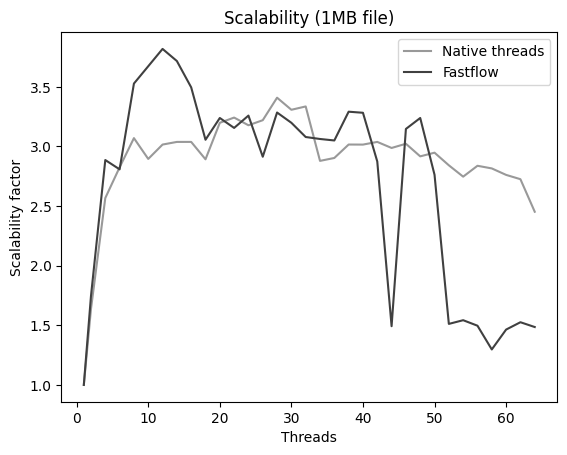

In [61]:
for i in range (0, len(thread_time)):
    scalability_thread.append([thread_time.index[i], parallel_time_thread_1/thread_time.iat[i]])

for i in range (0, len(ff_time)):
    scalability_ff.append([ff_time.index[i], parallel_time_ff_1/ff_time.iat[i]])

scalability_thread = pd.DataFrame(scalability_thread, columns=['Number of threads', 'Scalability'])
scalability_ff = pd.DataFrame(scalability_ff, columns=['Number of threads', 'Scalability'])

plt.plot(scalability_thread['Number of threads'], scalability_thread['Scalability'], c='0.6')
plt.plot(scalability_ff['Number of threads'], scalability_ff['Scalability'], c='0.25')

plt.ylabel("Scalability factor")
plt.xlabel("Threads")
plt.legend(["Native threads", "Fastflow"], loc=0, frameon=True)
plt.title("Scalability (1MB file)")
plt.savefig('Scalability_1MB_no_IO.png', bbox_inches='tight')
plt.show()

# 10 MB file

### Sequential time computation

In [62]:
sequential_time = pd.read_csv('../results/seq_results_10MB.csv', index_col=None)

In [63]:
# Compute the mean of the last column based on the penultimate column
sequential_time = sequential_time.groupby(sequential_time.columns[-2])[sequential_time.columns[-1]].mean()

In [64]:
seq_time = sequential_time[1]
ideal_time = [[1, 626000 + 210]]

for i in range (2, 65, 2):
    ideal_time.append([i, 626000/i + 210*i])

ideal_time = pd.DataFrame(ideal_time, columns=['Number of threads', 'Completion time'])

In [65]:
ideal_speedup = [[1, seq_time/ideal_time['Completion time'][0]]]

for i in range (2, 65, 2):
    ideal_speedup.append([i, seq_time/ideal_time['Completion time'][i/2]])

ideal_speedup = pd.DataFrame(ideal_speedup, columns=['Number of threads', 'Speedup'])

### Native threads time computation

In [66]:
thread_time = pd.read_csv('../results/thread_results_10MB.csv', index_col=None)

In [67]:
# Split the dataframe in two, based on the Completion time (if with or without IO)
thread_time_no_io = thread_time[thread_time['Completion time'] == 'Completion time (no IO)']

thread_time = thread_time_no_io

In [68]:
# Compute the mean of the last column based on the penultimate column
thread_time = thread_time.groupby(thread_time.columns[-2])[thread_time.columns[-1]].mean()

### Fastflow time computation

In [69]:
ff_time = pd.read_csv('../results/ff_results_10MB.csv', index_col=None)

In [70]:
# Split the dataframe in two, based on the Completion time (if with or without IO)
ff_time_completion = ff_time[ff_time['Completion time'] == 'Completion time']
ff_time_no_io = ff_time[ff_time['Completion time'] == 'Completion time (no IO)']

ff_time = ff_time_no_io

In [71]:
# Compute the mean of the last column based on the penultimate column
ff_time = ff_time.groupby(ff_time.columns[-2])[ff_time.columns[-1]].mean()

## Plots

### Completion time

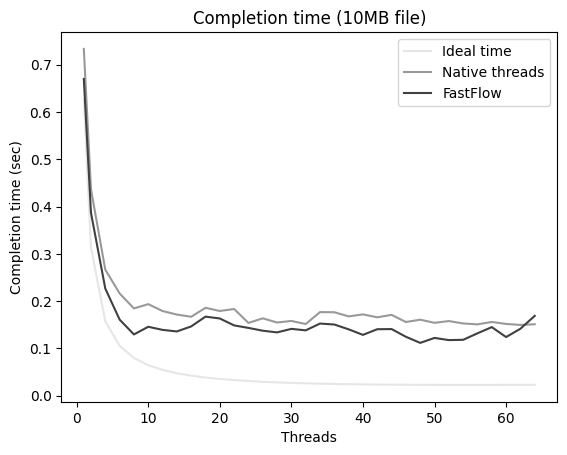

In [72]:
plt.plot(ideal_time['Number of threads'], ideal_time['Completion time']/1e6, c='0.90')

plt.plot(thread_time.index, thread_time.values/1e6, c='0.60')
plt.plot(ff_time.index, ff_time.values/1e6, c='0.25')
plt.xlabel('Threads')
plt.ylabel('Completion time (sec)')
plt.legend(["Ideal time", "Native threads", "FastFlow"], loc=0, frameon=True)
plt.title("Completion time (10MB file)")
plt.savefig('Completion_10MB_no_IO.png', bbox_inches='tight')
plt.show()

### Speedup

In [73]:
speedup_thread = []
speedup_ff = []

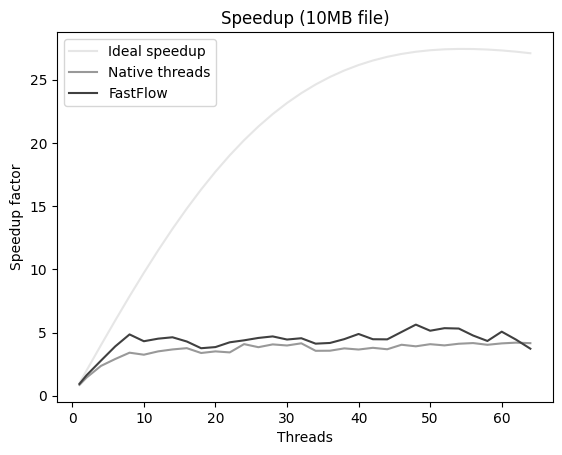

In [74]:
for i in range (0, len(thread_time)):
    speedup_thread.append([thread_time.index[i], seq_time/thread_time.iat[i]])
    
for i in range (0, len(ff_time)):
    speedup_ff.append([ff_time.index[i], seq_time/ff_time.iat[i]])
    
speedup_thread = pd.DataFrame(speedup_thread, columns=['Number of threads', 'Speedup'])
speedup_ff = pd.DataFrame(speedup_ff, columns=['Number of threads', 'Speedup'])

plt.plot(ideal_speedup['Number of threads'], ideal_speedup['Speedup'], c='0.9')
plt.plot(speedup_thread['Number of threads'], speedup_thread['Speedup'], c='0.6')
plt.plot(speedup_ff['Number of threads'], speedup_ff['Speedup'], c='0.25')

plt.ylabel('Speedup factor')
plt.xlabel("Threads")
plt.legend(["Ideal speedup", "Native threads", "FastFlow"], loc=0, frameon=True)
plt.title("Speedup (10MB file)")
plt.savefig('Speedup_10MB_no_IO.png', bbox_inches='tight')
plt.show()

### Scalability

In [75]:
parallel_time_thread_1 = thread_time.iat[0]
parallel_time_ff_1 = ff_time.iat[0]

scalability_thread = []
scalability_ff = []

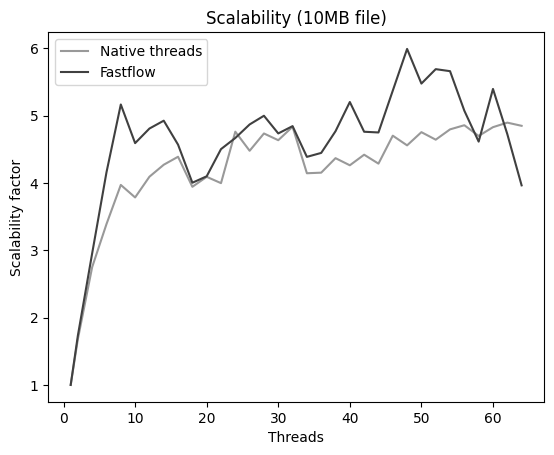

In [76]:
for i in range (0, len(thread_time)):
    scalability_thread.append([thread_time.index[i], parallel_time_thread_1/thread_time.iat[i]])

for i in range (0, len(ff_time)):
    scalability_ff.append([ff_time.index[i], parallel_time_ff_1/ff_time.iat[i]])

scalability_thread = pd.DataFrame(scalability_thread, columns=['Number of threads', 'Scalability'])
scalability_ff = pd.DataFrame(scalability_ff, columns=['Number of threads', 'Scalability'])

plt.plot(scalability_thread['Number of threads'], scalability_thread['Scalability'], c='0.6')
plt.plot(scalability_ff['Number of threads'], scalability_ff['Scalability'], c='0.25')

plt.ylabel("Scalability factor")
plt.xlabel("Threads")
plt.legend(["Native threads", "Fastflow"], loc=0, frameon=True)
plt.title("Scalability (10MB file)")
plt.savefig('Scalability_10MB_no_IO.png', bbox_inches='tight')
plt.show()

# 100 MB file

### Sequential time computation

In [77]:
sequential_time = pd.read_csv('../results/seq_results_100MB.csv', index_col=None)

In [78]:
# Compute the mean of the last column based on the penultimate column
sequential_time = sequential_time.groupby(sequential_time.columns[-2])[sequential_time.columns[-1]].mean()

In [79]:
seq_time = sequential_time[1]
ideal_time = [[1, 6600000 + 210]]

for i in range (2, 65, 2):
    ideal_time.append([i, 6600000/i + 210*i])

ideal_time = pd.DataFrame(ideal_time, columns=['Number of threads', 'Completion time'])

In [80]:
ideal_speedup = [[1, seq_time/ideal_time['Completion time'][0]]]

for i in range (2, 65, 2):
    ideal_speedup.append([i, seq_time/ideal_time['Completion time'][i/2]])

ideal_speedup = pd.DataFrame(ideal_speedup, columns=['Number of threads', 'Speedup'])

### Native threads time computation

In [81]:
thread_time = pd.read_csv('../results/thread_results_100MB.csv', index_col=None)

In [82]:
# Split the dataframe in two, based on the Completion time (if with or without IO)
thread_time_no_io = thread_time[thread_time['Completion time'] == 'Completion time (no IO)']

thread_time = thread_time_no_io

In [83]:
# Compute the mean of the last column based on the penultimate column
thread_time = thread_time.groupby(thread_time.columns[-2])[thread_time.columns[-1]].mean()

### Fastflow time computation

In [84]:
ff_time = pd.read_csv('../results/ff_results_100MB.csv', index_col=None)

In [85]:
# Split the dataframe in two, based on the Completion time (if with or without IO)
ff_time_no_io = ff_time[ff_time['Completion time'] == 'Completion time (no IO)']

ff_time = ff_time_no_io

In [86]:
# Compute the mean of the last column based on the penultimate column
ff_time = ff_time.groupby(ff_time.columns[-2])[ff_time.columns[-1]].mean()

## Plots

### Completion time

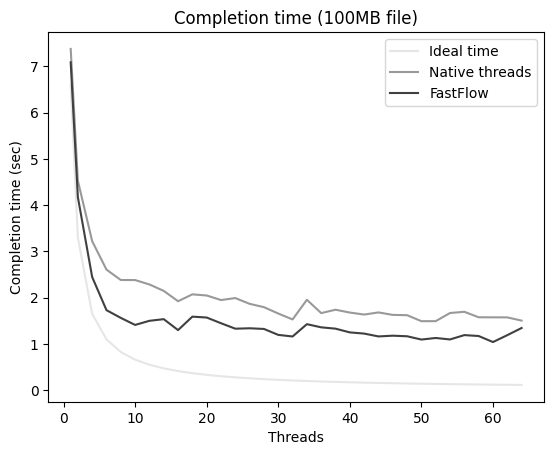

In [87]:
plt.plot(ideal_time['Number of threads'], ideal_time['Completion time']/1e6, c='0.90')

plt.plot(thread_time.index, thread_time.values/1e6, c='0.60')
plt.plot(ff_time.index, ff_time.values/1e6, c='0.25')
plt.xlabel('Threads')
plt.ylabel('Completion time (sec)')
plt.legend(["Ideal time", "Native threads", "FastFlow"], loc=0, frameon=True)
plt.title("Completion time (100MB file)")
plt.savefig('Completion_100MB_no_IO.png', bbox_inches='tight')
plt.show()

### Speedup

In [88]:
speedup_thread = []
speedup_ff = []

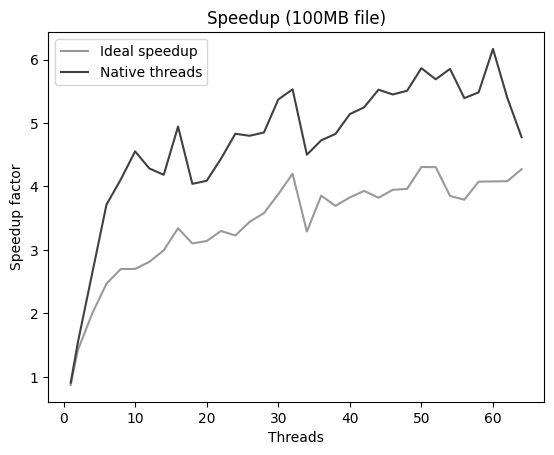

In [89]:
for i in range (0, len(thread_time)):
    speedup_thread.append([thread_time.index[i], seq_time/thread_time.iat[i]])
    
for i in range (0, len(ff_time)):
    speedup_ff.append([ff_time.index[i], seq_time/ff_time.iat[i]])
    
speedup_thread = pd.DataFrame(speedup_thread, columns=['Number of threads', 'Speedup'])
speedup_ff = pd.DataFrame(speedup_ff, columns=['Number of threads', 'Speedup'])

#plt.plot(ideal_speedup['Number of threads'], ideal_speedup['Speedup'], c='0.9')
plt.plot(speedup_thread['Number of threads'], speedup_thread['Speedup'], c='0.6')
plt.plot(speedup_ff['Number of threads'], speedup_ff['Speedup'], c='0.25')

plt.ylabel('Speedup factor')
plt.xlabel("Threads")
plt.legend(["Ideal speedup", "Native threads", "FastFlow"], loc=0, frameon=True)
plt.title("Speedup (100MB file)")
plt.savefig('Speedup_100MB_no_IO.png', bbox_inches='tight')
plt.show()

### Scalability

In [90]:
parallel_time_thread_1 = thread_time.iat[0]
parallel_time_ff_1 = ff_time.iat[0]

scalability_thread = []
scalability_ff = []

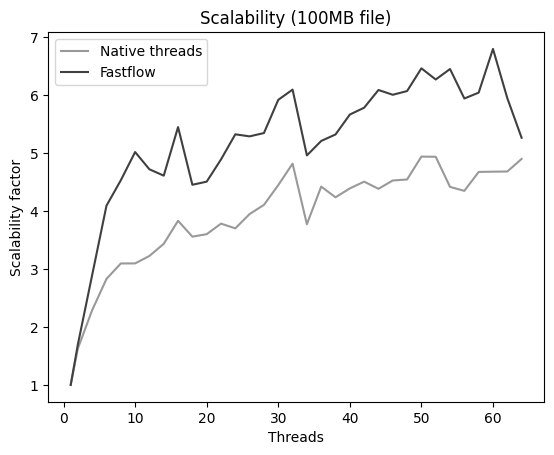

In [91]:
for i in range (0, len(thread_time)):
    scalability_thread.append([thread_time.index[i], parallel_time_thread_1/thread_time.iat[i]])

for i in range (0, len(ff_time)):
    scalability_ff.append([ff_time.index[i], parallel_time_ff_1/ff_time.iat[i]])

scalability_thread = pd.DataFrame(scalability_thread, columns=['Number of threads', 'Scalability'])
scalability_ff = pd.DataFrame(scalability_ff, columns=['Number of threads', 'Scalability'])

plt.plot(scalability_thread['Number of threads'], scalability_thread['Scalability'], c='0.6')
plt.plot(scalability_ff['Number of threads'], scalability_ff['Scalability'], c='0.25')

plt.ylabel("Scalability factor")
plt.xlabel("Threads")
plt.legend(["Native threads", "Fastflow"], loc=0, frameon=True)
plt.title("Scalability (100MB file)")
plt.savefig('Scalability_100MB_no_IO.png', bbox_inches='tight')
plt.show()

# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# 
# Thread analysis

In [92]:
ratio_1MB = []
ratio_10MB = []
ratio_100MB = []

## 1MB file

### Counting time

In [93]:
counting = pd.read_csv('../results/counting_1MB.csv', index_col=None)

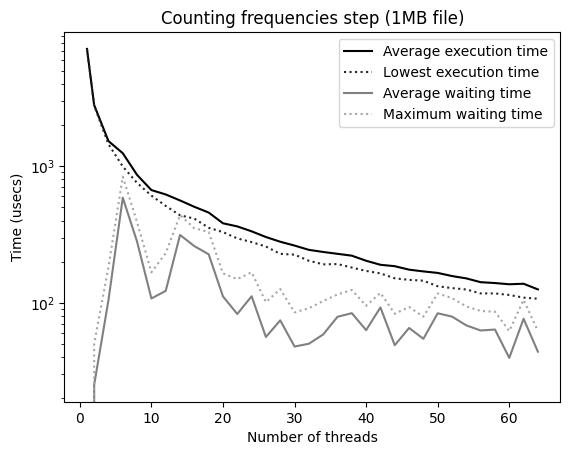

In [94]:
average_time = counting.groupby('Number of threads')[' time'].mean()

fastest_thread = counting.groupby('Number of threads')[' time'].min()

waiting_time = pd.read_csv('../results/counting_1MB.csv', index_col=None)

slowest_thread = counting.groupby('Number of threads')[' time'].max()

for i in slowest_thread.index:
    waiting_time.loc[waiting_time['Number of threads'] == i, ' time'] = slowest_thread[slowest_thread.index == i].iat[0] - waiting_time.loc[waiting_time['Number of threads'] == i, ' time']

average_waiting_time = waiting_time.groupby('Number of threads')[' time'].mean()
highest_waiting_time = waiting_time.groupby('Number of threads')[' time'].max()

# Plot the average time
plt.plot(average_time.index, average_time.values, c='0.0')
plt.plot(fastest_thread.index, fastest_thread.values, ls = ':', c='0.15')
plt.plot(average_waiting_time.index, average_waiting_time.values, c='0.5')
plt.plot(highest_waiting_time.index, highest_waiting_time.values, ls = ':', c='0.65')
plt.yscale('log')

plt.xlabel('Number of threads')
plt.ylabel('Time (usecs)')
plt.legend(["Average execution time", "Lowest execution time", "Average waiting time", "Maximum waiting time"], loc=0, frameon=True)

plt.title("Counting frequencies step (1MB file)")
plt.savefig('counting_1MB', bbox_inches='tight')


plt.show()

### Binary encoding time

In [95]:
counting = pd.read_csv('../results/binary_1MB.csv', index_col=None)

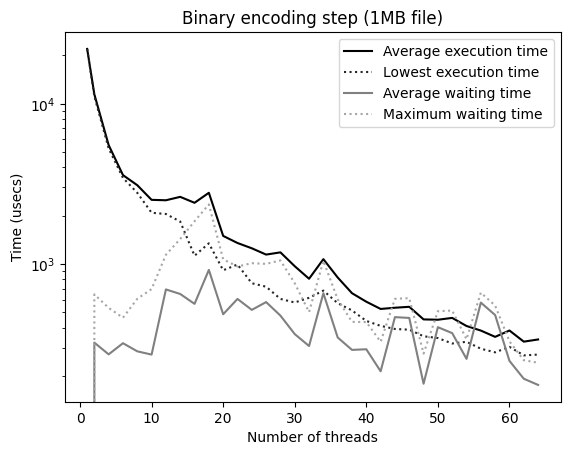

In [96]:
average_time = counting.groupby('Number of threads')[' time'].mean()

fastest_thread = counting.groupby('Number of threads')[' time'].min()

waiting_time = pd.read_csv('../results/binary_1MB.csv', index_col=None)

slowest_thread = counting.groupby('Number of threads')[' time'].max()

for i in slowest_thread.index:
    waiting_time.loc[waiting_time['Number of threads'] == i, ' time'] = slowest_thread[slowest_thread.index == i].iat[0] - waiting_time.loc[waiting_time['Number of threads'] == i, ' time']

average_waiting_time = waiting_time.groupby('Number of threads')[' time'].mean()
highest_waiting_time = waiting_time.groupby('Number of threads')[' time'].max()

# Plot the average time
plt.plot(average_time.index, average_time.values, c='0.0')
plt.plot(fastest_thread.index, fastest_thread.values, ls = ':', c='0.15')
plt.plot(average_waiting_time.index, average_waiting_time.values, c='0.5')
plt.plot(highest_waiting_time.index, highest_waiting_time.values, ls = ':', c='0.65')
plt.yscale('log')

plt.xlabel('Number of threads')
plt.ylabel('Time (usecs)')
plt.legend(["Average execution time", "Lowest execution time", "Average waiting time", "Maximum waiting time"], loc=0, frameon=True)


plt.title("Binary encoding step (1MB file)")
plt.savefig('binary_1MB', bbox_inches='tight')

plt.show()

### ASCII encoding time

In [97]:
counting = pd.read_csv('../results/ASCII_1MB.csv', index_col=None)

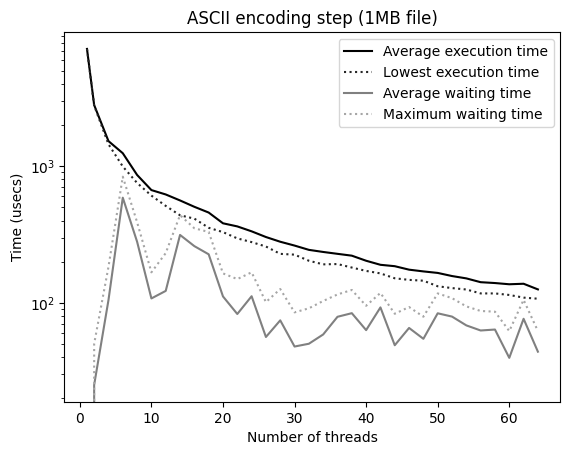

In [98]:
average_time = counting.groupby('Number of threads')[' time'].mean()

fastest_thread = counting.groupby('Number of threads')[' time'].min()

waiting_time = pd.read_csv('../results/ASCII_1MB.csv', index_col=None)

slowest_thread = counting.groupby('Number of threads')[' time'].max()

for i in slowest_thread.index:
    waiting_time.loc[waiting_time['Number of threads'] == i, ' time'] = slowest_thread[slowest_thread.index == i].iat[0] - waiting_time.loc[waiting_time['Number of threads'] == i, ' time']

average_waiting_time = waiting_time.groupby('Number of threads')[' time'].mean()
highest_waiting_time = waiting_time.groupby('Number of threads')[' time'].max()

# Plot the average time
plt.plot(average_time.index, average_time.values, c='0.0')
plt.plot(fastest_thread.index, fastest_thread.values, ls = ':', c='0.15')
plt.plot(average_waiting_time.index, average_waiting_time.values, c='0.5')
plt.plot(highest_waiting_time.index, highest_waiting_time.values, ls = ':', c='0.65')
plt.yscale('log')

plt.xlabel('Number of threads')
plt.ylabel('Time (usecs)')
plt.legend(["Average execution time", "Lowest execution time", "Average waiting time", "Maximum waiting time"], loc=0, frameon=True)

plt.title("ASCII encoding step (1MB file)")
plt.savefig('ascii_1MB', bbox_inches='tight')

plt.show()

## 10MB file

### Counting time

In [99]:
counting = pd.read_csv('../results/counting_10MB.csv', index_col=None)

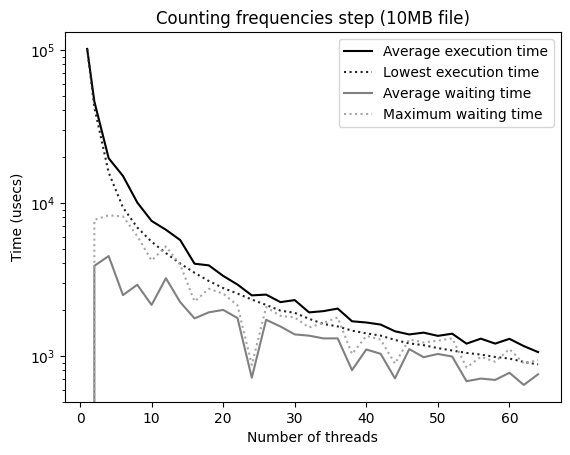

In [100]:
average_time = counting.groupby('Number of threads')[' time'].mean()

fastest_thread = counting.groupby('Number of threads')[' time'].min()

waiting_time = pd.read_csv('../results/counting_10MB.csv', index_col=None)

slowest_thread = counting.groupby('Number of threads')[' time'].max()

for i in slowest_thread.index:
    waiting_time.loc[waiting_time['Number of threads'] == i, ' time'] = slowest_thread[slowest_thread.index == i].iat[0] - waiting_time.loc[waiting_time['Number of threads'] == i, ' time']

average_waiting_time = waiting_time.groupby('Number of threads')[' time'].mean()
highest_waiting_time = waiting_time.groupby('Number of threads')[' time'].max()

# Plot the average time
plt.plot(average_time.index, average_time.values, c='0.0')
plt.plot(fastest_thread.index, fastest_thread.values, ls = ':', c='0.15')
plt.plot(average_waiting_time.index, average_waiting_time.values, c='0.5')
plt.plot(highest_waiting_time.index, highest_waiting_time.values, ls = ':', c='0.65')
plt.yscale('log')

plt.xlabel('Number of threads')
plt.ylabel('Time (usecs)')
plt.legend(["Average execution time", "Lowest execution time", "Average waiting time", "Maximum waiting time"], loc=0, frameon=True)


plt.title("Counting frequencies step (10MB file)")
plt.savefig('counting_10MB', bbox_inches='tight')

plt.show()

### Binary encoding time

In [101]:
counting = pd.read_csv('../results/binary_10MB.csv', index_col=None)

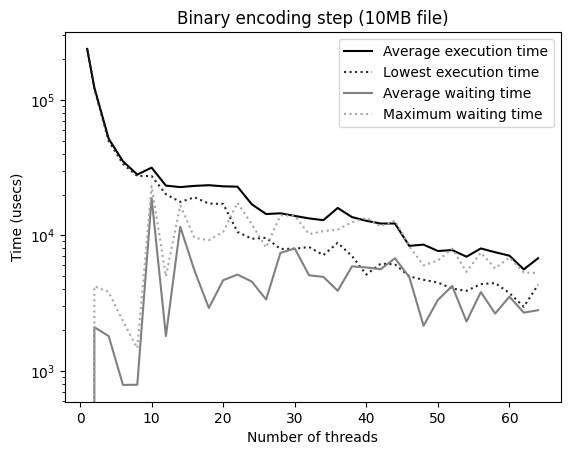

In [102]:
average_time = counting.groupby('Number of threads')[' time'].mean()

fastest_thread = counting.groupby('Number of threads')[' time'].min()

waiting_time = pd.read_csv('../results/binary_10MB.csv', index_col=None)

slowest_thread = counting.groupby('Number of threads')[' time'].max()

for i in slowest_thread.index:
    waiting_time.loc[waiting_time['Number of threads'] == i, ' time'] = slowest_thread[slowest_thread.index == i].iat[0] - waiting_time.loc[waiting_time['Number of threads'] == i, ' time']

average_waiting_time = waiting_time.groupby('Number of threads')[' time'].mean()
highest_waiting_time = waiting_time.groupby('Number of threads')[' time'].max()

# Plot the average time
plt.plot(average_time.index, average_time.values, c='0.0')
plt.plot(fastest_thread.index, fastest_thread.values, ls = ':', c='0.15')
plt.plot(average_waiting_time.index, average_waiting_time.values, c='0.5')
plt.plot(highest_waiting_time.index, highest_waiting_time.values, ls = ':', c='0.65')
plt.yscale('log')

plt.xlabel('Number of threads')
plt.ylabel('Time (usecs)')
plt.legend(["Average execution time", "Lowest execution time", "Average waiting time", "Maximum waiting time"], loc=0, frameon=True)

plt.title("Binary encoding step (10MB file)")
plt.savefig('binary_10MB', bbox_inches='tight')


plt.show()

### ASCII encoding time

In [103]:
counting = pd.read_csv('../results/ASCII_10MB.csv', index_col=None)

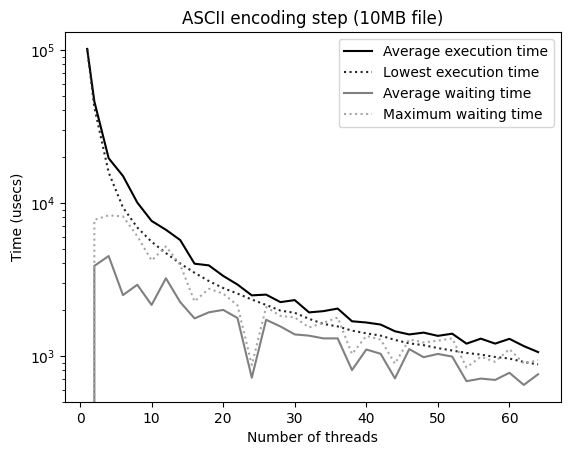

In [104]:
average_time = counting.groupby('Number of threads')[' time'].mean()

fastest_thread = counting.groupby('Number of threads')[' time'].min()

waiting_time = pd.read_csv('../results/ASCII_10MB.csv', index_col=None)

slowest_thread = counting.groupby('Number of threads')[' time'].max()

for i in slowest_thread.index:
    waiting_time.loc[waiting_time['Number of threads'] == i, ' time'] = slowest_thread[slowest_thread.index == i].iat[0] - waiting_time.loc[waiting_time['Number of threads'] == i, ' time']

average_waiting_time = waiting_time.groupby('Number of threads')[' time'].mean()
highest_waiting_time = waiting_time.groupby('Number of threads')[' time'].max()

# Plot the average time
plt.plot(average_time.index, average_time.values, c='0.0')
plt.plot(fastest_thread.index, fastest_thread.values, ls = ':', c='0.15')
plt.plot(average_waiting_time.index, average_waiting_time.values, c='0.5')
plt.plot(highest_waiting_time.index, highest_waiting_time.values, ls = ':', c='0.65')
plt.yscale('log')

plt.xlabel('Number of threads')
plt.ylabel('Time (usecs)')
plt.legend(["Average execution time", "Lowest execution time", "Average waiting time", "Maximum waiting time"], loc=0, frameon=True)

plt.title("ASCII encoding step (10MB file)")
plt.savefig('ascii_10MB', bbox_inches='tight')

plt.show()

## 100MB file

### Counting time

In [105]:
counting = pd.read_csv('../results/counting_100MB.csv', index_col=None)

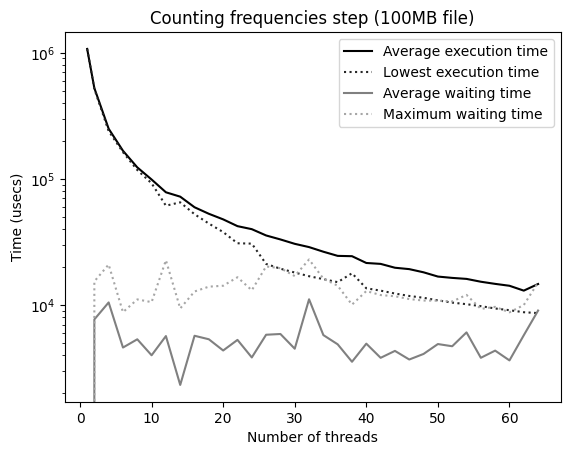

In [106]:
average_time = counting.groupby('Number of threads')[' time'].mean()

fastest_thread = counting.groupby('Number of threads')[' time'].min()

waiting_time = pd.read_csv('../results/counting_100MB.csv', index_col=None)

slowest_thread = counting.groupby('Number of threads')[' time'].max()

for i in slowest_thread.index:
    waiting_time.loc[waiting_time['Number of threads'] == i, ' time'] = slowest_thread[slowest_thread.index == i].iat[0] - waiting_time.loc[waiting_time['Number of threads'] == i, ' time']

average_waiting_time = waiting_time.groupby('Number of threads')[' time'].mean()
highest_waiting_time = waiting_time.groupby('Number of threads')[' time'].max()

# Plot the average time
plt.plot(average_time.index, average_time.values, c='0.0')
plt.plot(fastest_thread.index, fastest_thread.values, ls = ':', c='0.15')
plt.plot(average_waiting_time.index, average_waiting_time.values, c='0.5')
plt.plot(highest_waiting_time.index, highest_waiting_time.values, ls = ':', c='0.65')
plt.yscale('log')

plt.xlabel('Number of threads')
plt.ylabel('Time (usecs)')
plt.legend(["Average execution time", "Lowest execution time", "Average waiting time", "Maximum waiting time"], loc=0, frameon=True)


plt.title("Counting frequencies step (100MB file)")
plt.savefig('counting_100MB', bbox_inches='tight')

plt.show()

### Binary encoding time

In [107]:
counting = pd.read_csv('../results/binary_100MB.csv', index_col=None)

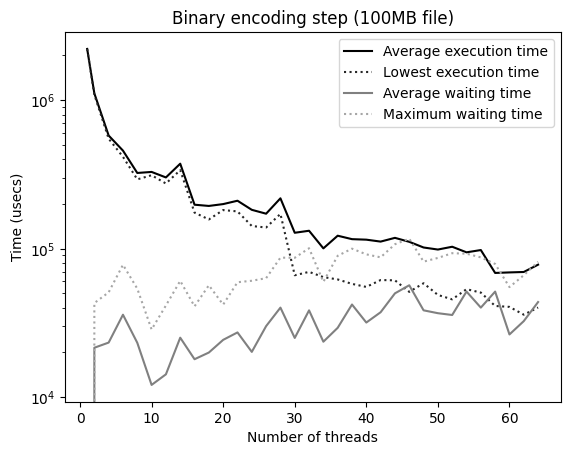

In [108]:
average_time = counting.groupby('Number of threads')[' time'].mean()

fastest_thread = counting.groupby('Number of threads')[' time'].min()

waiting_time = pd.read_csv('../results/binary_100MB.csv', index_col=None)

slowest_thread = counting.groupby('Number of threads')[' time'].max()

for i in slowest_thread.index:
    waiting_time.loc[waiting_time['Number of threads'] == i, ' time'] = slowest_thread[slowest_thread.index == i].iat[0] - waiting_time.loc[waiting_time['Number of threads'] == i, ' time']

average_waiting_time = waiting_time.groupby('Number of threads')[' time'].mean()
highest_waiting_time = waiting_time.groupby('Number of threads')[' time'].max()

# Plot the average time
plt.plot(average_time.index, average_time.values, c='0.0')
plt.plot(fastest_thread.index, fastest_thread.values, ls = ':', c='0.15')
plt.plot(average_waiting_time.index, average_waiting_time.values, c='0.5')
plt.plot(highest_waiting_time.index, highest_waiting_time.values, ls = ':', c='0.65')
plt.yscale('log')

plt.xlabel('Number of threads')
plt.ylabel('Time (usecs)')
plt.legend(["Average execution time", "Lowest execution time", "Average waiting time", "Maximum waiting time"], loc=0, frameon=True)

plt.title("Binary encoding step (100MB file)")
plt.savefig('binary_100MB', bbox_inches='tight')

plt.show()

### ASCII encoding time

In [109]:
counting = pd.read_csv('../results/ASCII_100MB.csv', index_col=None)

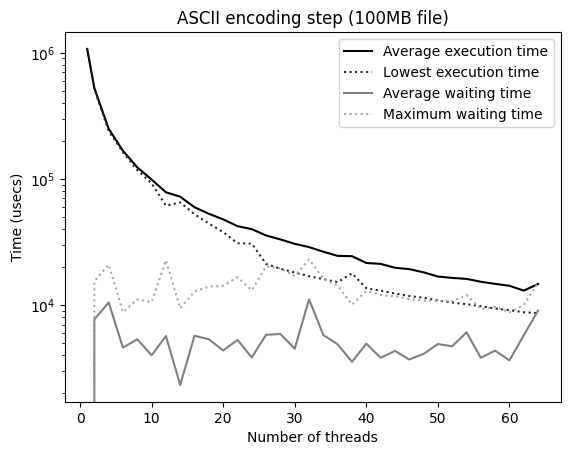

In [110]:
average_time = counting.groupby('Number of threads')[' time'].mean()

fastest_thread = counting.groupby('Number of threads')[' time'].min()

waiting_time = pd.read_csv('../results/ASCII_100MB.csv', index_col=None)

slowest_thread = counting.groupby('Number of threads')[' time'].max()

for i in slowest_thread.index:
    waiting_time.loc[waiting_time['Number of threads'] == i, ' time'] = slowest_thread[slowest_thread.index == i].iat[0] - waiting_time.loc[waiting_time['Number of threads'] == i, ' time']

average_waiting_time = waiting_time.groupby('Number of threads')[' time'].mean()
highest_waiting_time = waiting_time.groupby('Number of threads')[' time'].max()

# Plot the average time
plt.plot(average_time.index, average_time.values, c='0.0')
plt.plot(fastest_thread.index, fastest_thread.values, ls = ':', c='0.15')
plt.plot(average_waiting_time.index, average_waiting_time.values, c='0.5')
plt.plot(highest_waiting_time.index, highest_waiting_time.values, ls = ':', c='0.65')
plt.yscale('log')

plt.xlabel('Number of threads')
plt.ylabel('Time (usecs)')
plt.legend(["Average execution time", "Lowest execution time", "Average waiting time", "Maximum waiting time"], loc=0, frameon=True)


plt.title("ASCII encoding step (100MB file)")
plt.savefig('ascii_100MB', bbox_inches='tight')

plt.show()